### Copy model from
[link](https://github.com/lars76/object-localization)

In [89]:
%load_ext autoreload
%autoreload 2
from keras.utils import to_categorical
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [244]:
img_rows = img_cols = 128
input_shape = (img_rows, img_cols, 3)

In [254]:
import getimages
X_train = getimages.load_images_in_folder_to_nparray("./data/circles_train/")/255
X_test = getimages.load_images_in_folder_to_nparray("./data/circles_test/")/255
X_val = getimages.load_images_in_folder_to_nparray("./data/circles_val/")/255

In [255]:
from numpy import genfromtxt
y_train = genfromtxt('./data/circles_train/locations.csv', delimiter=',')/img_rows
y_test = genfromtxt('./data/circles_test/locations.csv', delimiter=',')/img_rows
y_val = genfromtxt('./data/circles_val/locations.csv', delimiter=',')/img_rows

### 1. Keras

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, core
from keras.layers.normalization import BatchNormalization
from keras.applications.mobilenet import MobileNet, _depthwise_conv_block
from keras.engine import training


batch_size = 32
num_classes = 2
epochs = 4000

# model = Sequential()
# model.add(Conv2D(32, kernel_size=(3, 3),
#                  activation='relu',
#                  kernel_initializer='he_normal',
#                  input_shape=input_shape))
# model.add(MaxPooling2D((2, 2)))
# model.add(Dropout(0.25))
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
# model.add(Conv2D(128, (3, 3), activation='relu'))
# model.add(Dropout(0.4))
# model.add(Flatten())
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.3))
# model.add(Dense(num_classes, activation='softmax'))
# model.add(Dense(4))

alpha = 0.25
model_net = MobileNet(input_shape=input_shape, include_top=False, alpha=alpha)
x = _depthwise_conv_block(model_net.layers[-1].output, 1024, alpha, 1, block_id=14)
x = MaxPooling2D(pool_size=(3, 3))(x)
x = Conv2D(4, kernel_size=(1, 1), padding="same")(x)
x = core.Reshape((4,))(x)

model = training.Model(inputs=model_net.input, outputs=x)

model.compile(loss='mean_squared_error',
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
import os
directory = "data/weights"
if not os.path.exists(directory):
    os.makedirs(directory)

checkpoint = ModelCheckpoint("data/weights/model-{val_acc:.2f}.h5", monitor="val_acc", verbose=1, save_best_only=True,
                                 save_weights_only=True, mode="auto", period=1)


history = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_val, y_val),
          callbacks=[checkpoint])
score = model.evaluate(X_test, y_test, verbose=0)

In [253]:
score = model.evaluate(X_test, y_test, verbose=0)
score

[0.00017363207007292658, 0.921875]

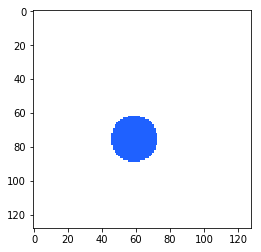

In [155]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(X_test[0]*img_rows)

In [222]:
model.load_weights('data/weights/model-0.80.h5')

In [233]:
score = model.evaluate(X_test, y_test, verbose=0)
score

[0.2920135259628296, 0.453125]

In [224]:
model.predict(X_test[:10])*img_rows

array([[107.54822  ,  74.33942  ,  12.885097 ,  38.782696 ],
       [189.9042   ,  39.784824 ,  64.883446 ,  82.18874  ],
       [111.49127  ,  63.33598  ,   6.7409773,  27.84951  ],
       [196.76804  ,  50.715443 ,  39.610027 ,  77.52666  ],
       [101.03614  ,  71.51645  ,   7.369563 ,  34.777122 ],
       [160.7457   ,  53.55865  ,  63.82712  ,  59.56056  ],
       [145.04706  ,  76.69173  ,  -2.6962786,  52.76259  ],
       [167.86528  ,  51.912235 ,  15.106746 ,  67.06177  ],
       [158.51672  ,  30.206003 ,  68.35494  ,  65.85654  ],
       [178.02858  ,  25.166872 ,  29.982481 ,  94.112076 ]],
      dtype=float32)

In [225]:
y_test[:10]*img_rows

array([[57., 76., 56., 56.],
       [84., 44., 56., 56.],
       [85., 57., 36., 36.],
       [59., 49., 44., 44.],
       [63., 44., 30., 30.],
       [82., 76., 30., 30.],
       [50., 77., 54., 54.],
       [58., 74., 50., 50.],
       [83., 85., 48., 48.],
       [73., 76., 64., 64.]])